In [2]:
p,q,r,s = 4,7,2,4
A = p%2 + 1
B = q%2 + 1
print('A - ',A)
print('B - ',B)

A -  1
B -  2


A - Least-Squares Linear Regression

In [3]:
X = q%3 + 1
if X == 1:
    print('Iris Setosa')
elif X == 2:
    print('Iris Versicolor')
else:
    print('Iris Virginica')
    
Y = r%3 +1
if Y == 1:
    print('Sepal Width')
elif Y == 2:
    print('Petal Length')
else:
    print('Petal Width')

print('My task is to determine the linear regression coefficients for Petal Width vs. Sepal Length for the Iris Versicolor')

Iris Versicolor
Petal Width
My task is to determine the linear regression coefficients for Petal Width vs. Sepal Length for the Iris Versicolor


In [40]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv(r'C:\Users\kersh\Documents\PETE\3061\Library\iris.csv')
dataset.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [41]:
dataset.drop('SepalWidthCm', inplace=True, axis=1)
dataset.drop('PetalLengthCm', inplace=True, axis=1)

data_index = dataset.set_index('Species')
data_index.drop(['Iris-setosa', 'Iris-virginica'])


,Id,SepalLengthCm,PetalWidthCm
Species,,,
Iris-versicolor,51,7.0,1.4
Iris-versicolor,52,6.4,1.5
Iris-versicolor,53,6.9,1.5
Iris-versicolor,54,5.5,1.3
Iris-versicolor,55,6.5,1.5
Iris-versicolor,56,5.7,1.3
Iris-versicolor,57,6.3,1.6
Iris-versicolor,58,4.9,1.0
Iris-versicolor,59,6.6,1.3


In [60]:
#rename SepalLength and PetalWidth
x = data_index['SepalLengthCm']
y = data_index['PetalWidthCm']


#mean for sepal length
xmean = np.mean(x)
#mean for petal width
ymean = np.mean(y)

data_index['xycov'] = (x - xmean) * (y - ymean)
data_index['xvar'] = (x - xmean)**2

#Calculate a0 and a1
a1 = data_index['xycov'].sum() / data_index['xvar'].sum()
a0 = ymean - (a1 * xmean)

print(f'a0 = {a0}')
print(f'a1 = {a1}')

a0 = -3.2062768959723327
a1 = 0.753840883509241


Text(0, 0.5, 'Petal Width')

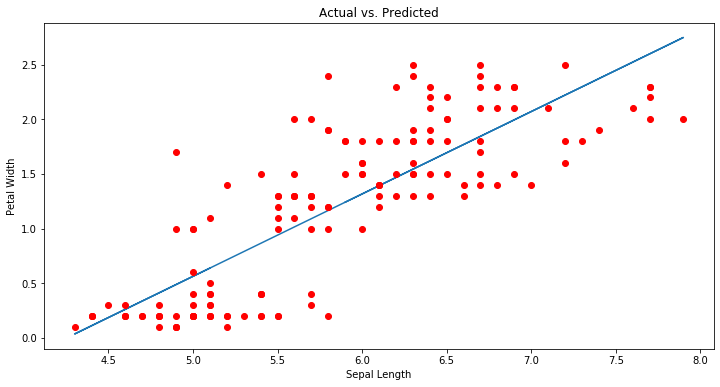

In [61]:
#predicted equation
ypred = a0 + a1 * x

#Plot regression against actual data
plt.figure(figsize=(12,6))
plt.plot(x,ypred)
plt.plot(x,y,'ro')
plt.title('Actual vs. Predicted')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

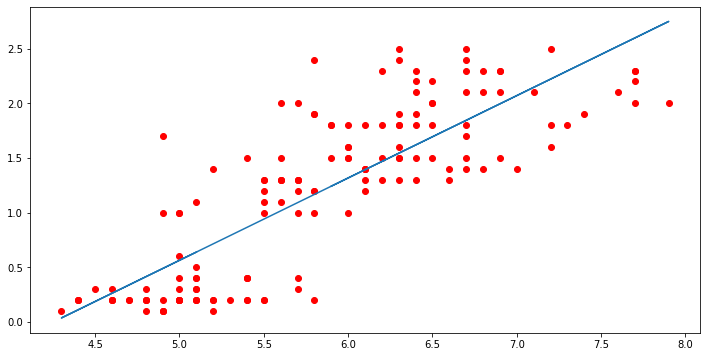

In [62]:
#Comparing my outcome to those from Scikit-learn
x = data_index['SepalLengthCm'].values.reshape(-1,1)
y = data_index['PetalWidthCm'].values.reshape(-1,1)

linear_regress = LinearRegression()
linear_regress.fit(x,y)
y_pred = linear_regress.predict(x)

plt.figure(figsize=(12,6))
plt.scatter(x,y,color='red')
plt.plot(x,y_pred)
plt.show()

B - Chi-Square Test: Calculate Y = s%4 + 1. Depending upon the value of Y, perform the
Chi-square test using the column data as following: 1. Sl; 2. Sw; 3. Pl; and 4. Pw for all three
categorical variables i.e. Iris species. Use χ2
(3) value of 0.115 to determine the independence
between categorical variables. Convert the column data into categorical variables by comparing
it’s frequency of being above or below the column mean e.g. count the number of Sl values that
were greater or less than Sl_mean.

In [74]:
Y = s%4 + 1
if Y == 1:
    print('Sepal Length')
elif Y == 2:
    print('Sepal Width')
elif Y == 3:
    print('Petal Length')
elif Y == 4:
    print('Petal Width')

from sklearn.preprocessing import LabelEncoder

Sepal Length


In [76]:
#df = dataset.set_index('Species')
#df.columns

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df['SepalLengthCm'] = label_encoder.fit_transform(df['SepalLengthCm'])

KeyError: 'Species'

In [64]:
df.pivot_table('Species', index)


,Id,SepalLengthCm
Species,,
Iris-setosa,1,5.1
Iris-setosa,2,4.9
Iris-setosa,3,4.7
Iris-setosa,4,4.6
Iris-setosa,5,5.0
Iris-setosa,6,5.4
Iris-setosa,7,4.6
Iris-setosa,8,5.0
Iris-setosa,9,4.4


In [70]:
#cant figure out how to pivot the table according to species so i made a new excel sheet
#values are for Sepal length

#df = pd.read_excel(r'C:\Users\kersh\Documents\PETE\3061\Library\iris2.xlsx')
#df

In [71]:
#setosa = df['Iris-Setosa']
#set_tot = np.sum(setosa)

#versi = df['Iris-Versicolor']
#ver_tot = np.sum(versi)

#virg = df['Iris-Virginica']
#vir_tot = np.sum(virg)

